## Load Data

In [23]:
import pandas as pd
import nltk
import seaborn as sns

data = pd.read_csv("../Artifacts/Spam_Data.csv")

In [24]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
data.shape

(5572, 2)

In [26]:
data.describe()

,Category,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [29]:
data['Category'].value_counts() 

Category
ham     4825
spam     747
Name: count, dtype: int64

C:\Users\pathi\AppData\Local\Temp\ipykernel_8760\2576144676.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category',data=data,palette='rainbow')


<Axes: xlabel='Category', ylabel='count'>

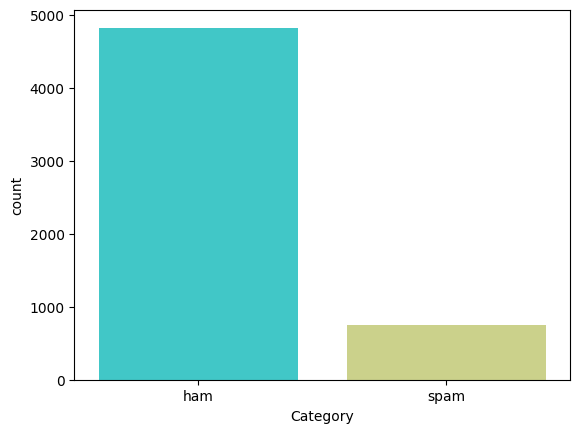

In [30]:

sns.countplot(x='Category',data=data,palette='rainbow')

In [31]:
nltk.download('punkt')
data['num_of_characters'] = data['Message'].apply(len)
data['num_words']=data['Message'].apply(lambda x:len(nltk.word_tokenize(x)))
data['num_sentences']=data['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))
data.head()




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pathi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Category,Message,num_of_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


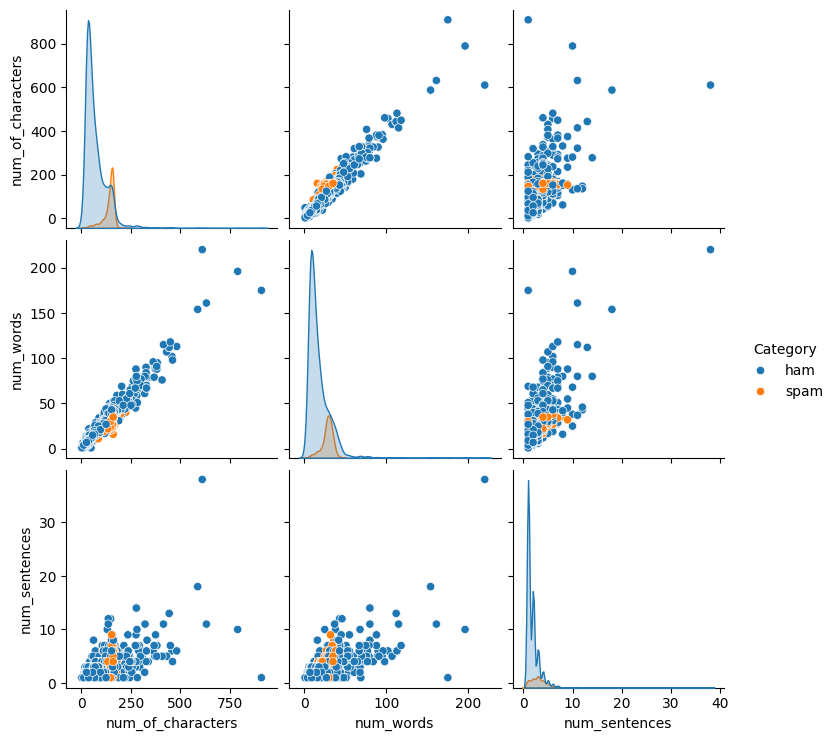

In [32]:
sns.pairplot(data,hue='Category')

## Data Preprocessing


### Data Cleaning

In [45]:
# Check if the null value exists
data["Message"].isnull().sum()

0

In [46]:
## In our data set there is no null values. But if there are null values we can replace null values with null string
data = data.where((pd.notnull(data)),'')

#### Check if there is duplicate data in the dataset. If so remove them.

In [47]:
duplicates_data = data[data.duplicated()]
duplicates_data


,Category,Message,num_of_characters,num_words,num_sentences
102,ham,As per your request 'Melle Melle (Oru Minnamin...,160,31,2
153,ham,As per your request 'Melle Melle (Oru Minnamin...,160,31,2
206,ham,"As I entered my cabin my PA said, '' Happy B'd...",156,40,6
222,ham,"Sorry, I'll call later",22,6,1
325,ham,No calls..messages..missed calls,32,7,1
...,...,...,...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...,153,32,9
5535,ham,"I know you are thinkin malaria. But relax, chi...",329,67,6
5539,ham,Just sleeping..and surfing,26,5,1
5553,ham,Hahaha..use your brain dear,27,6,1


In [48]:
## Checking number of duplicates in data
data_duplicate=data[data.duplicated(keep='first')]
data_duplicate.shape

(403, 5)

In [49]:
## Remove all duplucates , keeping first occurrence of the duplicates
data_new = data.drop_duplicates(keep='first')
data_new = data_new.drop(['num_of_characters','num_words','num_sentences'],axis=1)
data_new.shape

(5169, 2)

In [50]:
data_new.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [51]:
import string
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer


In [52]:

def preprocess_text(text):
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    tokens = [word for word in tokens if word.lower() not in set(stopwords.words('english'))]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    return ' '.join(tokens)

# #upper case to lower case
# data_new['Message'] = data_new['Message'].apply(lambda x:" ".join(x.lower() for x in x.split()))

# #Removing Punctuation
# def remove_punctuation(text):
#     for punctuation in string.punctuation:
#         text = text.replace(punctuation, '')
#     return text


In [101]:

# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
data_new['transformed_text']=data_new['Message'].apply(preprocess_text)
data_new.replace({'Category':{'spam':0,'ham':1}},inplace=True)
data_new.head()

,Category,Message,transformed_text
0,1,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,1,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,1,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,1,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though


In [102]:
#Vocabulary
from collections import Counter
vocab = Counter()
for sentence in data_new['transformed_text']:
    vocab.update(sentence.split())

In [105]:
len(vocab)
data_new.shape

(5169, 3)

In [59]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')


In [60]:
spam_wc = wc.generate(data_new[data_new['Category']==0]['transformed_text'].str.cat(sep=" "))

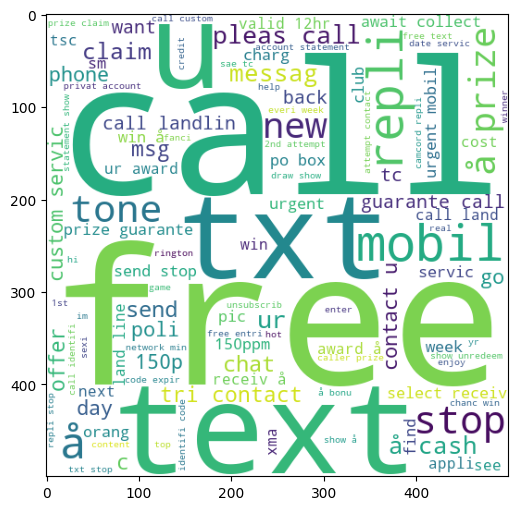

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

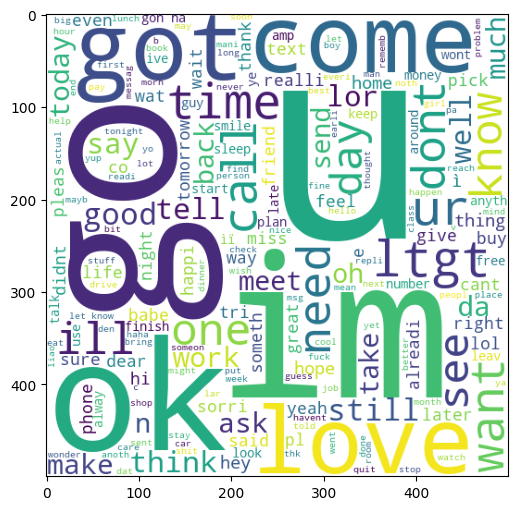

In [63]:
ham_wc = wc.generate(data_new[data_new['Category']==1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

## Feature extraction

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
feature_extraction=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)

x=feature_extraction.fit_transform(data_new['transformed_text'])
y=data_new['Category']

## Split the data into training and testing

In [65]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [66]:
x_train.shape

(4135, 7888)

In [67]:
x_test.shape

(1034, 7888)

### Balance the Training Date Set

In [68]:
from imblearn.over_sampling import SMOTE

res=SMOTE(random_state=50)
x_train_res,y_train_res=res.fit_resample(x_train,y_train)

([<matplotlib.patches.Wedge at 0x1b635f31910>,
 [Text(6.735557395310444e-17, 1.1, 'ham'),
  Text(-2.0206672185931328e-16, -1.1, 'spam')])

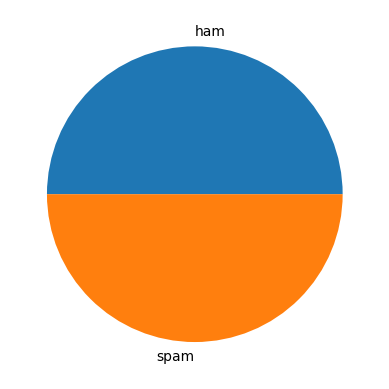

In [73]:
plt.pie(y_train_res.value_counts(),labels=['ham','spam'])


In [36]:
print(x_train_res)

  (0, 6747)	0.7909530511861876
  (0, 1342)	0.4593394437042946
  (0, 3570)	0.4042283343318344
  (1, 3023)	0.6371752572870057
  (1, 3543)	0.53266616740989
  (1, 3720)	0.3198203954324351
  (1, 6909)	0.3388196637741745
  (1, 5077)	0.3052713476621956
  (2, 1088)	0.6200059887063257
  (2, 3412)	0.3933049566480692
  (2, 2324)	0.3583765702651824
  (2, 6815)	0.32261979545101044
  (2, 6759)	0.38077193756105104
  (2, 4254)	0.2887892277742853
  (3, 1167)	0.7538447855895843
  (3, 6815)	0.6570525391773429
  (4, 6925)	0.47128692296686603
  (4, 3720)	0.35203708632811487
  (4, 2452)	0.4951591903196671
  (4, 7091)	0.5439345633951184
  (4, 5077)	0.3360224591841568
  (5, 492)	0.257979438027112
  (5, 1961)	0.257979438027112
  (5, 731)	0.257979438027112
  (5, 5464)	0.4755822216956753
  :	:
  (7233, 7151)	0.13311852880275263
  (7233, 6059)	0.19109764651701527
  (7233, 7254)	0.11519576552052092
  (7233, 4870)	0.1366026822875326
  (7233, 1889)	0.16369268720930089
  (7233, 3368)	0.15832043559161915
  (7233, 3597

## Train the model using Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression
model_LR=LogisticRegression()
model_LR.fit(x_train_res,y_train_res)


LogisticRegression()

## Evaluate the model for Logistic Regression

In [75]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score,confusion_matrix


#### For training data Set

In [78]:
prediction_on_training_LR=model_LR.predict(x_train_res)

accuracy_on_training_LR=accuracy_score(y_train_res,prediction_on_training_LR)
precision_score_on_training_LR=precision_score(y_train_res,prediction_on_training_LR)
recall_score_on_training_LR=recall_score(y_train_res,prediction_on_training_LR)
f1_score_on_training_LR=f1_score(y_train_res,prediction_on_training_LR)
print("Accuracy on training data:",accuracy_on_training_LR,"\nPrecision on training data:",precision_score_on_training_LR,"\nRecall on training data:",recall_score_on_training_LR,"\nF1 Score on training data:",f1_score_on_training_LR)

Accuracy on training data: 0.992397014100083 
Precision on training data: 0.9900935608145295 
Recall on training data: 0.9947470279236936 
F1 Score on training data: 0.9924148393325058


#### For Tesing data set

In [76]:
prediction_on_testing_LR=model_LR.predict(x_test)

accuracy_on_testing_LR=accuracy_score(y_test,prediction_on_testing_LR)
precision_score_LR=precision_score(y_test,prediction_on_testing_LR)
recall_score_LR=recall_score(y_test,prediction_on_testing_LR)
f1_score_LR=f1_score(y_test,prediction_on_testing_LR)
print("Accuracy on Testing: ",accuracy_on_testing_LR,"\nPrecision on Testing: ",precision_score_LR,"\nRecall on Testing: ",recall_score_LR,"\nF1 Score on Testing: ",f1_score_LR)

Accuracy on Testing:  0.9709864603481625 
Precision on Testing:  0.9769484083424808 
Recall on Testing:  0.9899888765294772 
F1 Score on Testing:  0.9834254143646408


In [79]:
confusion_matrix_LR=confusion_matrix(y_test,prediction_on_testing_LR)
confusion_matrix_LR

array([[114,  21],
       [  9, 890]], dtype=int64)

## Train the model using Naive Bayer Classifier

In [80]:
from sklearn.naive_bayes import MultinomialNB
model_NB=MultinomialNB()
model_NB.fit(x_train_res,y_train_res)

MultinomialNB()

## Evaluate the model for Naive Bayer

#### For training data Set

In [81]:
prediction_on_training_NB=model_NB.predict(x_train_res)

accuracy_on_training_NB=accuracy_score(y_train_res,prediction_on_training_NB)
precision_score_on_training_NB=precision_score(y_train_res,prediction_on_training_NB)
recall_score_on_training_NB=recall_score(y_train_res,prediction_on_training_NB)
f1_score_on_training_NB=f1_score(y_train_res,prediction_on_training_NB)
print("Accuracy on training data:",accuracy_on_training_NB,"\nPrecision on training data:",precision_score_on_training_NB,"\nRecall on training data:",recall_score_on_training_NB,"\nF1 Score on training data:",f1_score_on_training_NB)

Accuracy on training data: 0.9852087365219795 
Precision on training data: 0.9924242424242424 
Recall on training data: 0.977882222836605 
F1 Score on training data: 0.98509956830525


#### For testing data Set

In [82]:
prediction_on_tesing_NB=model_NB.predict(x_test)

accuracy_on_testing_NB=accuracy_score(y_test,prediction_on_tesing_NB)
precision_score_NB=precision_score(y_test,prediction_on_tesing_NB)
recall_score_NB=recall_score(y_test,prediction_on_tesing_NB)
f1_score_NB=f1_score(y_test,prediction_on_tesing_NB)
print("Accuracy on Testing: ",accuracy_on_testing_NB,"\nPrecision on Testing: ",precision_score_NB,"\nRecall on Testing: ",recall_score_NB,"\nF1 Score on Testing: ",f1_score_NB)

Accuracy on Testing:  0.9642166344294004 
Precision on Testing:  0.9886621315192744 
Recall on Testing:  0.9699666295884316 
F1 Score on Testing:  0.9792251544076361


In [84]:
confusion_matrix_on_tesing_NB=confusion_matrix(y_test,prediction_on_tesing_NB)
confusion_matrix_on_tesing_NB

array([[125,  10],
       [ 27, 872]], dtype=int64)

In [85]:
input=["SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info"]
input_data=feature_extraction.transform(input)


## making predintions
pred= model_LR.predict(input_data)
if pred==1:
    print("Ham")
else:
    print("Spam")

Spam


## Hyper parameters tuning for Naive Bayes

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
class_prior = [0.3,0.7]
param_grid_NB={'alpha':[0.00000001,0.0000001, 0.000001,0.00001,0.0001,0.001,0.01,0.1,1,2,3,4,5,6,7,8,9,10,15,20,25,30,40,50],
            'force_alpha':[True,False],
            'fit_prior':[True,False],
            'class_prior':[class_prior,'None']}

In [88]:
grid_search_NB =GridSearchCV(estimator=model_NB,param_grid=param_grid_NB)
grid_search_NB.fit(x_train_res,y_train_res)

d:\RuhunaNew\Academic\3rd Year\ML\Email_Spam\Spam-Email-Detection-ML_Editted_By_D\env\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
480 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "d:\RuhunaNew\Academic\3rd Year\ML\Email_Spam\Spam-Email-Detection-ML_Editted_By_D\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\RuhunaNew\Academic\3rd Year\ML\Email_Spam\Spam-Email-Detection-ML_Editted_By_D\env\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()


GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                   0.01, 0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                   20, 25, 30, 40, 50],
                         'class_prior': [[0.3, 0.7], 'None'],
                         'fit_prior': [True, False],
                         'force_alpha': [True, False]})

In [89]:
grid_search_NB.best_params_

{'alpha': 0.001,
 'class_prior': [0.3, 0.7],
 'fit_prior': True,
 'force_alpha': True}

In [90]:
grid_search_NB.score(x_test,y_test)

0.9748549323017408

## Hyper parameters tuning for Logistic Regression

In [91]:
param_grid_LR={'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'penalty': ['l1', 'l2'],
               'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
               'multi_class': ['auto', 'ovr', 'multinomial','auto']}

In [92]:
grid_search_LR =GridSearchCV(estimator=model_LR,param_grid=param_grid_LR)
grid_search_LR.fit(x_train_res,y_train_res)

d:\RuhunaNew\Academic\3rd Year\ML\Email_Spam\Spam-Email-Detection-ML_Editted_By_D\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\RuhunaNew\Academic\3rd Year\ML\Email_Spam\Spam-Email-Detection-ML_Editted_By_D\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\RuhunaNew\Academic\3rd Year\ML\Email_Spam\Spam-Email-Detection-ML_Editted_By_D\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\RuhunaNew\Academic\3rd Year\ML\Email_Spam\Spam-Email-Detection-ML_Editted_By_D\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\RuhunaNew\Academic\3rd Year\ML\Email_Spam

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'multi_class': ['auto', 'ovr', 'multinomial', 'auto'],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']})

In [93]:
grid_search_LR.best_params_

{'C': 100, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'liblinear'}

In [94]:
grid_search_LR.score(x_test,y_test)

0.9738878143133463

## Cross Validation

In [95]:
from sklearn.model_selection import cross_val_score

In [96]:
cross_val_score_LR=cross_val_score(model_LR,x,y,cv=10).mean()
cross_val_score_LR

0.9466045911864814

In [97]:
cross_val_score_NB=cross_val_score(model_NB,x,y,cv=10).mean()
cross_val_score_NB

0.9618888039224507

In [98]:
import pickle 
with open('../static/logistic_model.pickle','wb') as file:
    pickle.dump(model_LR,file)

with open('../static/naivebayes_model.pickle','wb') as file:
    pickle.dump(model_NB,file)